In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./lesson_3_data__1_.csv', encoding='windows-1251')

In [5]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [7]:
work_df = df[['tc', 'art_sp']]
work_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [8]:
work_df = work_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [9]:
work_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [11]:
def split_brand(data):
    return data.split(' ')[-1]

In [12]:
work_df['brand_name'] = work_df.brand_info.apply(split_brand)
work_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [13]:
work_df.brand_info.apply(lambda x: x.split(' ')[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [24]:
users_purchases = work_df.groupby('user_id', as_index=False) \
.agg({'brand_name': 'count'}) \
.rename(columns={'brand_name': 'purchases'}) \
.sort_values('purchases', ascending=False)
users_purchases

,user_id,purchases
6326,62325711,60
3376,19317282,55
670,1228091,52
1377,3133061,51
3965,23440561,47
...,...,...
6479,64377021,1
6476,64375071,1
6475,64373901,1
6471,64283361,1


In [25]:
users_purchases.shape

(11764, 2)

In [26]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [28]:
users_purchases = users_purchases \
.query('purchases >= 5') \
.sort_values('purchases', ascending=False)
users_purchases

,user_id,purchases
6326,62325711,60
3376,19317282,55
670,1228091,52
1377,3133061,51
3965,23440561,47
...,...,...
3463,19776171,5
10218,112028971,5
8577,90849701,5
4610,28315352,5


In [29]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [31]:
users_purchases_details = work_df.groupby(['user_id', 'brand_name'], as_index=False) \
.agg({'brand_info': 'count'}) \
.sort_values(['user_id', 'brand_info'], ascending= [True, False]) \
.groupby('user_id') \
.head(1) \
.rename(columns={'brand_name': 'favore_brand', 'brand_info': 'favore_brand_purchases'})
users_purchases_details

,user_id,favore_brand,favore_brand_purchases
0,-1236394515,Brand_4,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
5,17311,Brand_4,2
6,17312,Brand_1,1
...,...,...,...
18183,1408817589,Store_Brand,2
18184,1408825059,Brand_1,1
18185,1408832719,Brand_4,3
18186,1408840919,Store_Brand,1


In [36]:
users_unique_brands = work_df.groupby('user_id', as_index=False) \
.agg({'brand_name': pd.Series.nunique}) \
.rename(columns={'brand_name': 'unique_brands'})
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [38]:
loyality_df = users_purchases \
.merge(users_unique_brands, on='user_id') \
.merge(users_purchases_details, on='user_id') \
.sort_values('user_id')

In [39]:
loyality_df

,user_id,purchases,unique_brands,favore_brand,favore_brand_purchases
2345,1031,6,2,Store_Brand,5
2987,4241,5,2,Brand_4,3
1943,25971,7,2,Store_Brand,5
56,40911,27,5,Brand_4,19
2953,45181,5,4,Store_Brand,2
...,...,...,...,...,...
2676,1408767189,5,1,Brand_4,5
936,1408783189,10,2,Store_Brand,8
2548,1408783379,6,2,Brand_1,4
1554,1408798879,8,3,Store_Brand,4


In [40]:
loyal_users = loyality_df[loyality_df.unique_brands == 1]
loyal_users

,user_id,purchases,unique_brands,favore_brand,favore_brand_purchases
472,86281,14,1,Brand_4,14
2410,94961,6,1,Brand_4,6
1317,132061,9,1,Brand_4,9
2549,134281,6,1,Brand_4,6
708,157311,12,1,Brand_4,12
...,...,...,...,...,...
1257,1010244089,9,1,Store_Brand,9
2736,1010247239,5,1,Brand_4,5
3253,1010274559,5,1,Brand_4,5
2842,1110091379,5,1,Brand_1,5


In [41]:
loyality_df['loyalty_score'] = loyality_df.favore_brand_purchases / loyality_df.purchases
loyality_df.head()

,user_id,purchases,unique_brands,favore_brand,favore_brand_purchases,loyalty_score
2345,1031,6,2,Store_Brand,5,0.833333
2987,4241,5,2,Brand_4,3,0.600000
1943,25971,7,2,Store_Brand,5,0.714286
56,40911,27,5,Brand_4,19,0.703704
2953,45181,5,4,Store_Brand,2,0.400000


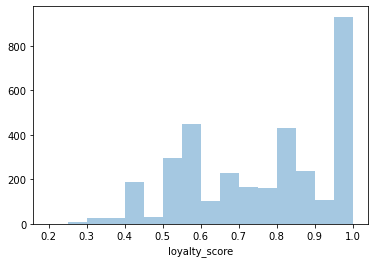

In [44]:
ax = sns.distplot(loyality_df.loyalty_score, kde=False)

In [46]:
split_loyalty_brands = loyality_df.groupby('favore_brand', as_index=False) \
.agg({'loyalty_score': 'median', 'user_id': 'count'})
split_loyalty_brands

,favore_brand,loyalty_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


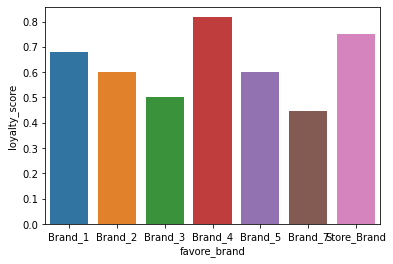

In [47]:
ax = sns.barplot(x='favore_brand', y='loyalty_score', data=split_loyalty_brands)

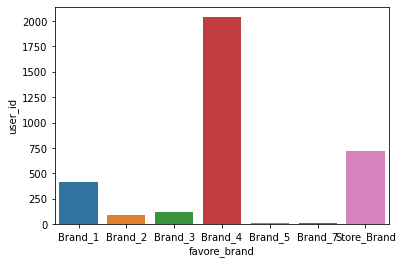

In [48]:
ax = sns.barplot(x='favore_brand', y='user_id', data=split_loyalty_brands)